# TP1 : Logique floue -- AFIFI SAAD IID3

## Importation

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

## Exercice 1 : Distance_to_next_car (univers [0,30])

1. Définir la variable floue « Distance_to_next_car » sur l’univers de discours [0, 30]

In [2]:
dist_universe = np.arange(0, 30.1, 0.1)
Distance_to_next_car = ctrl.Antecedent(dist_universe, 'Distance_to_next_car')

2, 3. Nous créons 5 ensembles linguistiques :
    - v_small (très petite -- trap)
    - small (petite -- tri)
    - perfect (idéale -- tri)
    - big (grande -- tri)
    - v_big (très grande -- trap)
On utilise des `trapmf` pour les extrêmes (plateau possible) et `trimf` pour les termes intermédiaires.

In [3]:
Distance_to_next_car['v_small'] = fuzz.trapmf(Distance_to_next_car.universe, [0, 0, 2.5, 7])     # très petite distance
Distance_to_next_car['small']   = fuzz.trimf(Distance_to_next_car.universe, [5, 9, 13])          # petite
Distance_to_next_car['perfect'] = fuzz.trimf(Distance_to_next_car.universe, [11, 15, 19])        # idéale
Distance_to_next_car ['big']     = fuzz.trimf(Distance_to_next_car.universe, [17, 21, 25])        # grande
Distance_to_next_car['v_big']   = fuzz.trapmf(Distance_to_next_car.universe, [23, 26, 30, 30])   # très grande

4. Visualiser les fonctions d’appartenance obtenues. 

c:\Users\Asus VivoBook F1605P\AppData\Local\Programs\Python\Python312\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


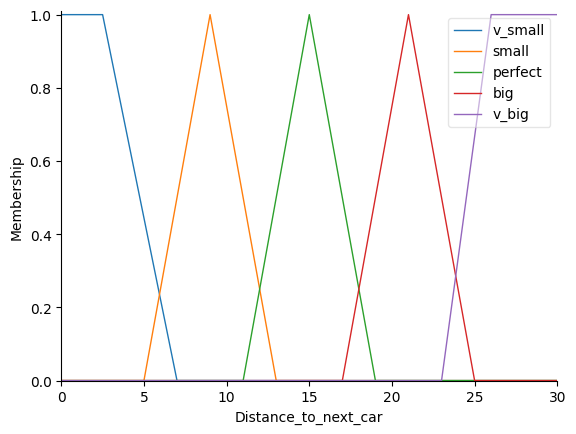

In [4]:
Distance_to_next_car.view()

## Exercice 2 : Speed_change (univers [-20,20])
Trois ensembles :
- declining (diminution)
- constant (stable)
- growing (augmentation)

1. Définir la variable floue Speed_change sur l’univers de discours [ -20, 20]. 

In [5]:
speed_change_universe = np.arange(-20, 21, 1)
Speed_change = ctrl.Antecedent(speed_change_universe, 'Speed_change')

2, 3. Créer trois ensembles flous correspondant aux termes linguistiques

In [6]:
Speed_change['declining'] = fuzz.trimf(Speed_change.universe, [-20, -10, 2])

Speed_change['constant']  = fuzz.trapmf(Speed_change.universe, [-3, -1, 1, 3])

Speed_change['growing']   = fuzz.trimf(Speed_change.universe, [2, 10, 20])

4. Visualisation

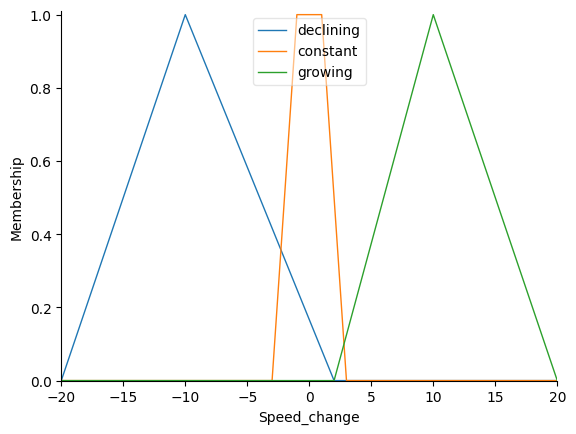

In [7]:
Speed_change.view()

## Exercice 3 : Acceleration_Adjust (univers [-3,3])

1. Définir la variable floue de sortie Acceleration_Adjust sur l’univers de discours [ -3,3]. 

In [8]:
acc_universe = np.arange(-3, 4, 1)
Acceleration = ctrl.Consequent(acc_universe, 'Acceleration_Adjust')

2, 3. Cinq ensembles :
- neg_big (forte décélération)
- neg_small (faible décélération)
- zero (aucune variation)
- pos_small (faible accélération)
- pos_big (forte accélération)

Nous utilisons trapézoïdes pour les extrêmes et trimf pour les autres.

In [9]:
Acceleration['neg_big']   = fuzz.trapmf(Acceleration.universe, [-3, -3, -2.2, -1.2])
Acceleration['neg_small'] = fuzz.trimf(Acceleration.universe, [-2.0, -1.0, -0.2])
Acceleration['zero']      = fuzz.trimf(Acceleration.universe, [-0.5, 0.0, 0.5])
Acceleration['pos_small'] = fuzz.trimf(Acceleration.universe, [0.2, 1.0, 2.0])
Acceleration['pos_big']   = fuzz.trapmf(Acceleration.universe, [1.2, 2.0, 3.0, 3.0])

4. Tracer les fonctions d’appartenance de la variable Acceleration_Adjust 

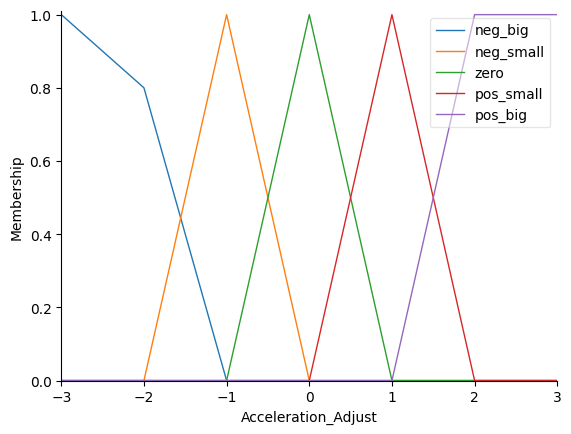

In [10]:
Acceleration.view()

## Exercice 4 : Base de règles floues

In [11]:
# Règles (suivant l'énoncé)
r1  = ctrl.Rule(Distance_to_next_car['v_small'] & Speed_change['declining'], Acceleration['neg_small'])
r2  = ctrl.Rule(Distance_to_next_car['v_small'] & Speed_change['constant'],  Acceleration['neg_big'])
r3  = ctrl.Rule(Distance_to_next_car['v_small'] & Speed_change['growing'],   Acceleration['neg_big'])

r4  = ctrl.Rule(Distance_to_next_car['small']   & Speed_change['declining'], Acceleration['zero'])
r5  = ctrl.Rule(Distance_to_next_car['small']   & Speed_change['constant'],  Acceleration['neg_small'])
r6  = ctrl.Rule(Distance_to_next_car['small']   & Speed_change['growing'],   Acceleration['neg_big'])

r7  = ctrl.Rule(Distance_to_next_car['perfect'] & Speed_change['declining'], Acceleration['pos_small'])
r8  = ctrl.Rule(Distance_to_next_car['perfect'] & Speed_change['constant'],  Acceleration['zero'])
r9  = ctrl.Rule(Distance_to_next_car['perfect'] & Speed_change['growing'],   Acceleration['neg_small'])

r10 = ctrl.Rule(Distance_to_next_car['big']     & Speed_change['declining'], Acceleration['pos_big'])
r11 = ctrl.Rule(Distance_to_next_car['big']     & Speed_change['constant'],  Acceleration['pos_small'])
r12 = ctrl.Rule(Distance_to_next_car['big']     & Speed_change['growing'],   Acceleration['zero'])

r13 = ctrl.Rule(Distance_to_next_car['v_big']   & Speed_change['declining'], Acceleration['pos_big'])
r14 = ctrl.Rule(Distance_to_next_car['v_big']   & Speed_change['constant'],  Acceleration['pos_big'])
r15 = ctrl.Rule(Distance_to_next_car['v_big']   & Speed_change['growing'],   Acceleration['pos_small'])

# Construire le système
acc_ctrl = ctrl.ControlSystem([r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15])


## Simulation

Simuler le système pour :
- Distance_to_next_car = 13
- Speed_change = -2.5

In [12]:
sim = ctrl.ControlSystemSimulation(acc_ctrl)

# Entrées demandées
sim.input['Distance_to_next_car'] = 13.0
sim.input['Speed_change'] = -2.5

# Calcul
sim.compute()

acc_value = sim.output['Acceleration_Adjust']
print(f"Acceleration_Adjust = {acc_value:.4f} (m/s²)")

Acceleration_Adjust = 0.5930 (m/s²)


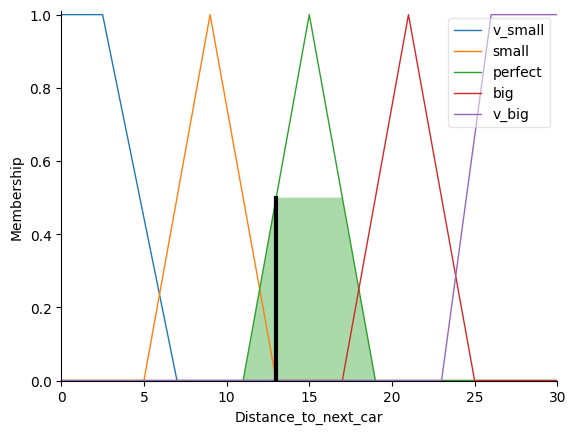

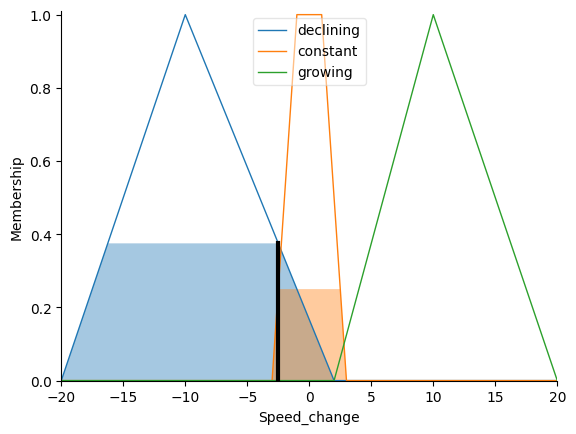

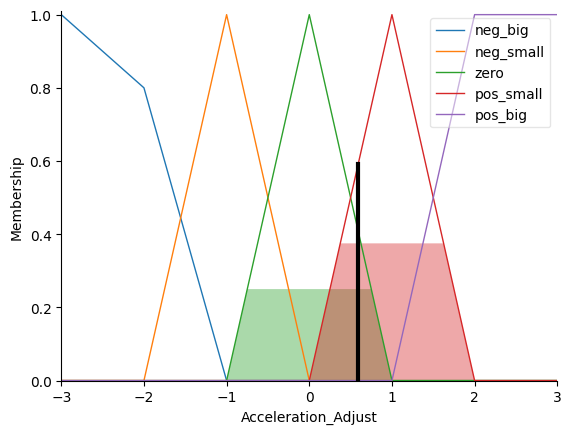

In [13]:
# Visualiser les entrées et sortie avec l'état de simulation
Distance_to_next_car.view(sim=sim)
Speed_change.view(sim=sim)
Acceleration.view(sim=sim)
plt.show()

## TP2 -- AFIFI Saad IID3

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Génération aléatoire des entrées
n = 1000
X_distance = np.random.uniform(0, 30, n)
X_speed = np.random.uniform(-20, 20, n)

Y_acc = []

for d, s in zip(X_distance, X_speed):
    sim.input['Distance_to_next_car'] = d
    sim.input['Speed_change'] = s
    sim.compute()
    Y_acc.append(sim.output['Acceleration_Adjust'])

# Créer le DataFrame
data = pd.DataFrame({
    'Distance_to_next_car': X_distance,
    'Speed_change': X_speed,
    'Acceleration_Adjust': Y_acc
})
data.head()

,Distance_to_next_car,Speed_change,Acceleration_Adjust
0,4.220736,-5.013366,-1.000000
1,18.932176,14.056561,-0.037926
2,18.303861,17.652102,-0.421834
3,19.543729,-10.006679,2.148965
4,29.784167,16.867575,1.000000


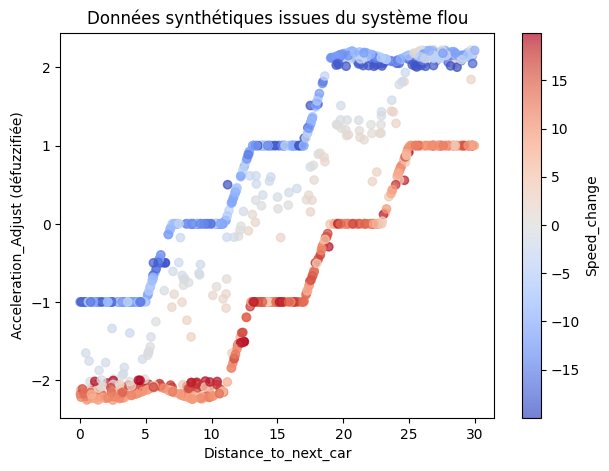

In [16]:
plt.figure(figsize=(7,5))
plt.scatter(data['Distance_to_next_car'], data['Acceleration_Adjust'], c=data['Speed_change'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Speed_change')
plt.xlabel('Distance_to_next_car')
plt.ylabel('Acceleration_Adjust (défuzzifiée)')
plt.title('Données synthétiques issues du système flou')
plt.show()

In [19]:
# Séparation train/test
X = data[['Distance_to_next_car', 'Speed_change']]
y = data['Acceleration_Adjust']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle ML
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

In [20]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Erreur absolue moyenne (MAE) : {mae:.4f}")
print(f"Erreur quadratique moyenne (MSE) : {mse:.4f}")

Erreur absolue moyenne (MAE) : 0.0285
Erreur quadratique moyenne (MSE) : 0.0055


## Comparaison entre logique floue et modèle ML

| Critère | Logique floue | Machine Learning |
|----------|----------------|------------------|
| **Principe** | Basée sur des règles linguistiques et la connaissance experte. | Basé sur l'apprentissage à partir des données. |
| **Explicabilité** | Très élevée - on comprend chaque règle et son effet. | Faible à moyenne - dépend du modèle (forêt = boîte noire). |
| **Adaptabilité** | Moins flexible sans ajustement manuel des règles. | Très flexible, peut apprendre des relations non linéaires complexes. |
| **Précision numérique** | Moyenne, dépend des paramètres. | Souvent plus élevée (optimisation automatique). |
| **Données nécessaires** | Peu, ou aucune (expertise humaine suffit). | Beaucoup de données pour bien généraliser. |

### Conclusion
- La **logique floue** est idéale pour la **compréhension** et les systèmes où la connaissance humaine est disponible.  
- Le **Machine Learning** surpasse souvent en **précision**, mais perd en **interprétabilité**.  
- En combinant les deux (comme ici), on obtient un système **hybride** : explicable et précis.